# Getting Started with Time Series

시계열은 시간에 따라 달라지는 데이터 포인트의 시퀀스입니다.  
예를 들어, 이커머스 웹사이트에서 제품에 대한 수요(또는 판매량)는 시계열로 시간적으로 측정할 수 있으며, 시간에 따라 수요(또는 판매량)가 정렬됩니다.  
그런 다음 이 데이터를 분석하여 중요한 시간적 인사이트를 찾고 미래 가치를 예측할 수 있으며, 이는 기업이 수익을 계획하고 증가시키는 데 도움이 됩니다.  
시계열 데이터는 실시간 분석이 필수적인 모든 도메인에서 사용됩니다.  
이러한 도메인에서는 이 데이터를 분석하고 미래 가치를 예측하는 것이 필수적입니다.  
시계열 분석/예측은 이전에는 순전히 통계적인 문제로 여겨졌습니다.  
현재는 많은 머신러닝 및 딥러닝 기반 솔루션에서 동일한 성능을 발휘하거나 대부분의 다른 솔루션보다 뛰어난 성능을 발휘합니다.  
이 책은 시계열을 분석하고 예측하기 위해 다양한 방법과 접근 방식을 사용합니다.  
이 장에서는 레시피를 사용하여 시계열 데이터를 읽고 쓰고 간단한 전처리 및 탐색 데이터 분석(EDA)을 수행합니다.

## Recipe 1-1A. Reading Time Series Objects (Air Passengers)

시계열 데이터를 읽고 데이터 프레임에 로드하려고 합니다.

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime # Import the datetime module

datetime 열에 대한 구문 분석 함수를 작성합니다.

In [14]:
# Define the date parsing function using datetime.strptime
date_parser_fn = lambda dates: datetime.strptime(dates, '%Y-%m')

<ipython-input-15-eed3bdf37231>:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv("/content/AirPassengers.csv", parse_dates=['Month'], index_col='Month', date_parser=date_parser_fn)


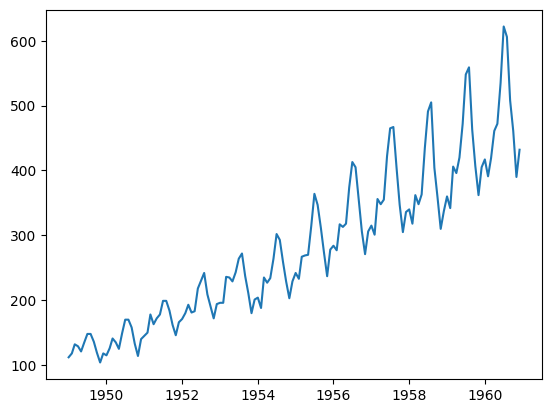

In [15]:
data = pd.read_csv("/content/AirPassengers.csv", parse_dates=['Month'], index_col='Month', date_parser=date_parser_fn)
plt.plot(data)
plt.show()

이전에 로드된 시계열 객체를 저장합니다.

In [21]:
### Saving the TS object as csv
data.to_csv('/content/ts_data.csv', index = True, sep = ',')
### Check the obj stored
data1 = pd.read_csv('/content/ts_data.csv')
### Check
data1.head(2)

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118


## Recipe 1-3A. Exploring Types of Time Series Data: Univariate

단변량 시계열 데이터를 로드하고 탐색하려고 합니다.

단변량 시계열은 단일 시간 종속 변수가 있는 데이터입니다. 1981년부터 1990년까지 남반구의 월별 최저 기온에 대한 샘플 데이터 세트를 살펴봅시다. 온도는 시간 종속 목표 변수입니다.

In [24]:
data = pd.read_csv('/content/daily-min-temperatures.csv', header = 0, index_col = 0, parse_dates = True)
# If the DataFrame has only one column, convert it to a Series
if len(data.columns) == 1:
    data = data.squeeze()
print(data.head())

Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
Name: Temp, dtype: float64


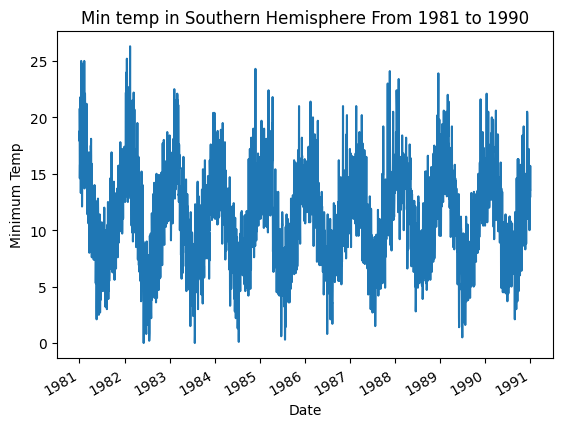

In [25]:
data.plot()
plt.ylabel('Minimum Temp')
plt.title('Min temp in Southern Hemisphere From 1981 to 1990')
plt.show()

단변량 시계열 분석이라고 불리는 이유는 지난 19년간의 온도라는 하나의 변수만 사용되었기 때문입니다.

## Recipe 1-3B. Exploring Types of Time Series Data: Multivariate

다변량 시계열은 대상이 시간에 따라 달라지는 더 많은 특징을 가진 시계열 데이터의 한 유형입니다. 즉, 대상은 과거 값에만 의존하는 것이 아닙니다. 이 관계는 대상 값을 예측하는 데 사용됩니다.

원시 데이터셋을 로드하고 데이터타임 정보를 판다 데이터프레임 인덱스로 파싱하기 전에 먼저 파싱 함수를 작성해 보겠습니다.

In [26]:
from datetime import datetime
def parse(x):
    return datetime.strptime(x, '%Y %m %d %H')

In [27]:
data1 = pd.read_csv('/content/raw.csv', parse_dates = [['year','month', 'day', 'hour']],index_col=0, date_parser=parse)
data1.drop('No', axis=1, inplace=True)

<ipython-input-27-19513a102e84>:1: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  data1 = pd.read_csv('/content/raw.csv', parse_dates = [['year','month', 'day', 'hour']],index_col=0, date_parser=parse)
<ipython-input-27-19513a102e84>:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data1 = pd.read_csv('/content/raw.csv', parse_dates = [['year','month', 'day', 'hour']],index_col=0, date_parser=parse)


각 열 이름을 수동으로 지정합니다.

In [28]:
data1.columns = ['pollution', 'dew', 'temp', 'press', 'wnd_dir', 'wnd_spd', 'snow', 'rain']
data1.index.name = 'date'

모든 NA 값을 0으로 표시해 보겠습니다.

In [29]:
data1['pollution'].fillna(0, inplace=True)

<ipython-input-29-8232a0c96d62>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data1['pollution'].fillna(0, inplace=True)


In [30]:
data1 = data1[24:]

In [31]:
print(data1.head(5))

                     pollution  dew  temp   press wnd_dir  wnd_spd  snow  rain
date                                                                          
2010-01-02 00:00:00      129.0  -16  -4.0  1020.0      SE     1.79     0     0
2010-01-02 01:00:00      148.0  -15  -4.0  1020.0      SE     2.68     0     0
2010-01-02 02:00:00      159.0  -11  -5.0  1021.0      SE     3.57     0     0
2010-01-02 03:00:00      181.0   -7  -5.0  1022.0      SE     5.36     1     0
2010-01-02 04:00:00      138.0   -7  -5.0  1022.0      SE     6.25     2     0


이 정보는 베이징의 오염 및 기상 조건에 대한 데이터 세트에서 가져온 것입니다. 기록의 시간 집계는 시간별로 이루어졌으며 5년 동안 측정되었습니다. 데이터에는 날짜 열, PM2.5 ­ 농도로 알려진 오염 지표, 온도, 기압, 풍속 등 몇 가지 중요한 기상 정보가 포함되어 있습니다.

이제 각 시리즈를 별도의 하위 플롯으로 표시해 보겠습니다. 다만, 풍속 방향은 범주형입니다.

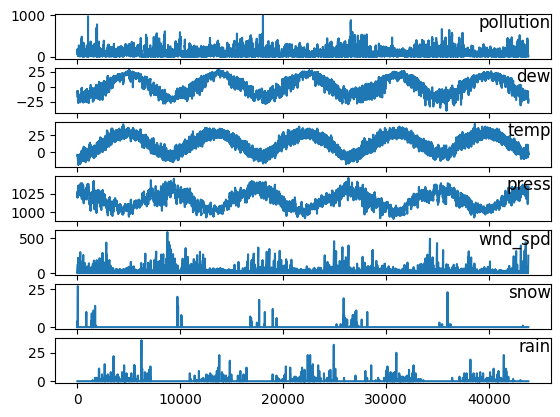

In [32]:
vals = data1.values
# specify columns to plot
group_list = [0, 1, 2, 3, 5, 6, 7]
i = 1
# plot each column
plt.figure()
for group in group_list:
    plt.subplot(len(group_list), 1, i)
    plt.plot(vals[:, group])
    plt.title(data1.columns[group], y=0.5, loc='right')
    i += 1
plt.show()

## Recipe 1-4A. Time Series Components: Trends

추세란 특정 방향으로 데이터가 전반적으로 이동하는 것을 말합니다. 즉, 일정 기간 동안 값이 상승(증가)하거나 하락(감소)하는 것을 말합니다. 3년 동안 월별 판매량이 있는 샴푸 판매량 데이터셋을 사용해 보겠습니다.

In [33]:
def parsing_fn(x):
    return datetime.strptime('190'+x, '%Y-%m')

<ipython-input-35-ee1b49423acc>:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv('/content/shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, date_parser=parsing_fn)


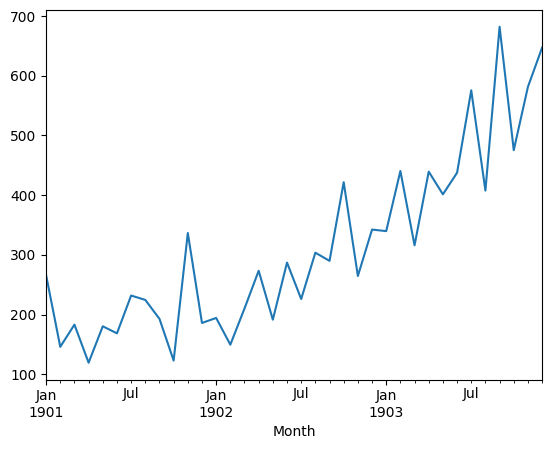

In [35]:
data = pd.read_csv('/content/shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, date_parser=parsing_fn)
# If the DataFrame has only one column, convert it to a Series
if len(data.columns) == 1:
    data = data.iloc[:, 0]  # Extract the first column as a Series
data.plot()
plt.show()

출력 시계열 그래프는 평균적으로 시간이 지남에 따라 값이 증가한다는 것을 보여줍니다.

## Recipe 1-4B. Time Series Components: Seasonality

계절성은 특정 패턴의 재발이나 시계열 데이터의 변화를 의미합니다. 1981년부터 1990년까지의 호주 멜버른 일일 최저 기온 데이터셋을 사용해 보겠습니다. 초점은 계절성에 맞춰져 있습니다.

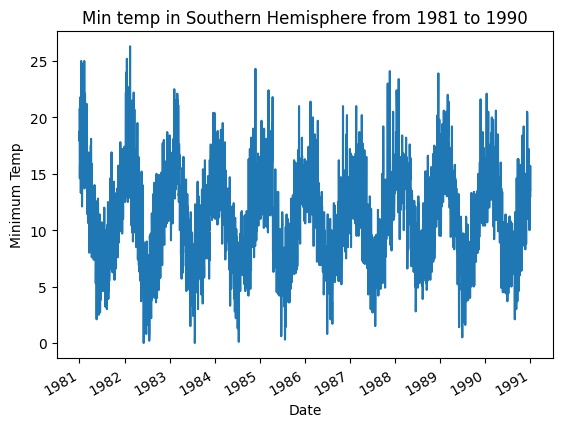

In [39]:
data = pd.read_csv('/content/daily-min-temperatures.csv',header = 0, index_col = 0, parse_dates = True)
# If the DataFrame has only one column, convert it to a Series
if len(data.columns) == 1:
    data = data.squeeze() # Squeeze the DataFrame if it has only one column
data.plot()
plt.ylabel('Minimum Temp')
plt.title('Min temp in Southern Hemisphere from 1981 to 1990')
plt.show()

1990년 월별 변동을 확인하기 위해 상자 그림을 시각화해 보겠습니다.

<ipython-input-40-571e4292c5eb>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  grouped_df = one_year_ser.groupby(pd.Grouper(freq='M'))


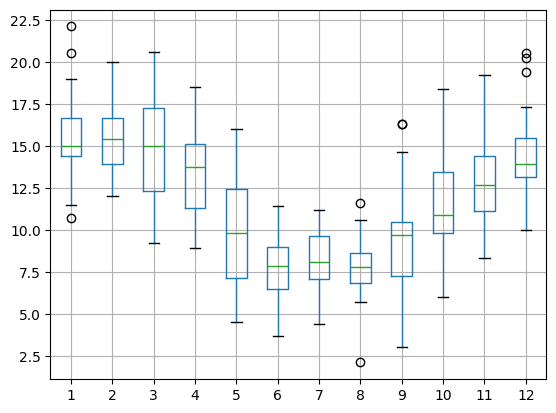

In [40]:
month_df = pd.DataFrame()
one_year_ser = data['1990']
grouped_df = one_year_ser.groupby(pd.Grouper(freq='M'))
month_df = pd.concat([pd.DataFrame(x[1].values) for x in grouped_df], axis=1)
month_df = pd.DataFrame(month_df)
month_df.columns = range(1,13)
month_df.boxplot()
plt.show()

상자 그림은 월별 최저 기온 분포를 보여줍니다. 매년 계절적 요소가 있는 것으로 보이며 여름에서 겨울로 이동하는 모습을 보여줍니다. 이는 월별 계절성을 의미합니다.

연도별로 그룹을 나누어 다양한 연도별 분포 변화를 살펴봅시다. 이렇게 하면 매 시간 집계에서 계절성을 확인할 수 있습니다.

<ipython-input-41-90aa2628708a>:1: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  grouped_ser = data.groupby(pd.Grouper(freq='A'))


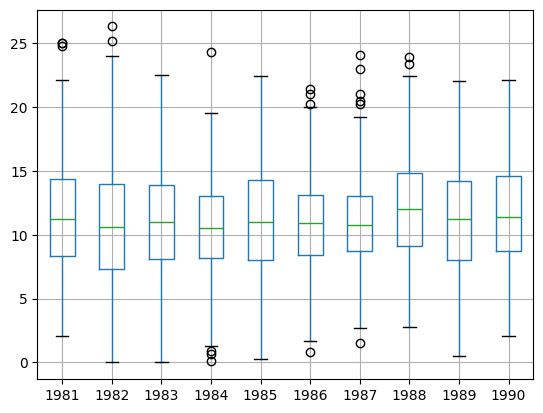

In [41]:
grouped_ser = data.groupby(pd.Grouper(freq='A'))
year_df = pd.DataFrame()
for name, group in grouped_ser:
    year_df[name.year] = group.values
year_df.boxplot()
plt.show()

## Recipe 1-4C. Time Series Components: Seasonality (cont’d.)

In [42]:
tractor_sales_data = pd.read_csv("/content/tractor_salesSales.csv")
tractor_sales_data.head(5)

,Month-Year,Number of Tractor Sold
0,3-Jan,141
1,3-Feb,157
2,3-Mar,185
3,3-Apr,199
4,3-May,203


인덱스로 사용할 날짜 시계열을 설정합니다.

In [43]:
date_ser = pd.date_range(start='2003-01-01', freq='MS',periods=len(tractor_sales_data))

데이터를 형식화합니다.

In [44]:
tractor_sales_data.rename(columns={'Number of Tractor Sold':'Tractor-Sales'}, inplace=True)
tractor_sales_data.set_index(date_ser, inplace=True)
tractor_sales_data = tractor_sales_data[['Tractor-Sales']]
tractor_sales_data.head(5)

,Tractor-Sales
2003-01-01,141
2003-02-01,157
2003-03-01,185
2003-04-01,199
2003-05-01,203


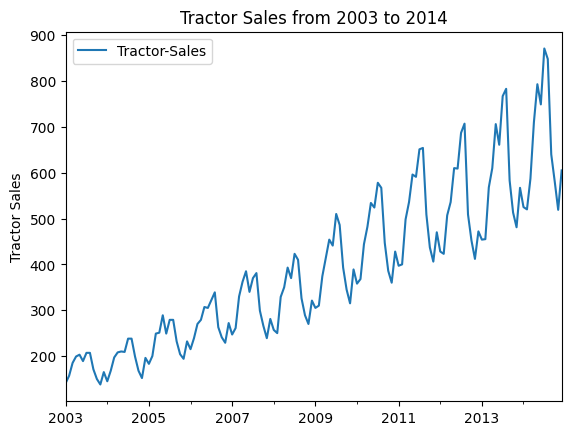

In [45]:
tractor_sales_data.plot()
plt.ylabel('Tractor Sales')
plt.title("Tractor Sales from 2003 to 2014")
plt.show()

<ipython-input-48-7283587a6a35>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  grouped_ser = one_year_ser.groupby(pd.Grouper(freq='M'))


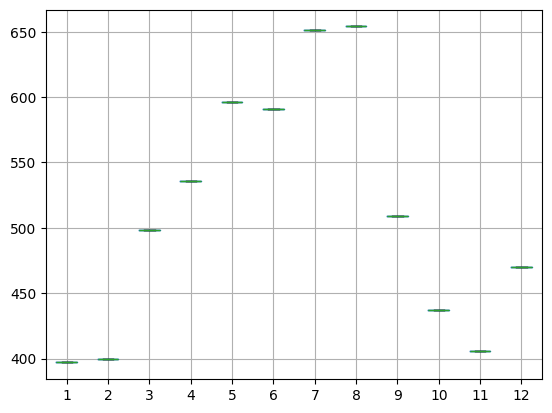

In [48]:
month_df = pd.DataFrame()
# Select data for the year 2011 using .loc and a date range
one_year_ser = tractor_sales_data.loc['2011-01-01':'2011-12-31']
grouped_ser = one_year_ser.groupby(pd.Grouper(freq='M'))
month_df = pd.concat([pd.DataFrame(x[1].values) for x in grouped_ser], axis=1)
month_df = pd.DataFrame(month_df)
month_df.columns = range(1,13)
month_df.boxplot()
plt.show()

상자 그림은 매년 계절별 구성 요소를 보여주며, 5월부터 8월까지 변동이 있습니다.

## Recipe 1-5A. Time Series Decomposition: Additive Model

덧셈 모델은 구성 요소가 합산된다는 것을 시사합니다. 시간이 지남에 따라 지속적으로 같은 양으로 변화하는 선형입니다. 계절성은 동일한 주파수와 진폭을 가져야 합니다. 주파수는 사이클 간의 너비이고 진폭은 각 사이클의 높이입니다. 통계 모델 라이브러리에는 고전적인 분해 방법이 구현되어 있지만 사용자는 모델이 덧셈인지 곱셈인지 지정해야 합니다. 이 함수는 season_decompose라고 합니다.

In [49]:
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm

소매 회전율 데이터를 읽고 처리합니다.

In [50]:
turn_over_data = pd.read_csv('/content/RetailTurnover.csv')
date_range = pd.date_range(start='1/7/1982', end='31/3/1992',freq='Q')
turn_over_data['TimeIndex'] = pd.DataFrame(date_range,columns=['Quarter'])

<ipython-input-50-263c39b9e56d>:2: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  date_range = pd.date_range(start='1/7/1982', end='31/3/1992',freq='Q')


<ipython-input-51-9b7dc517f113>:2: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='best')


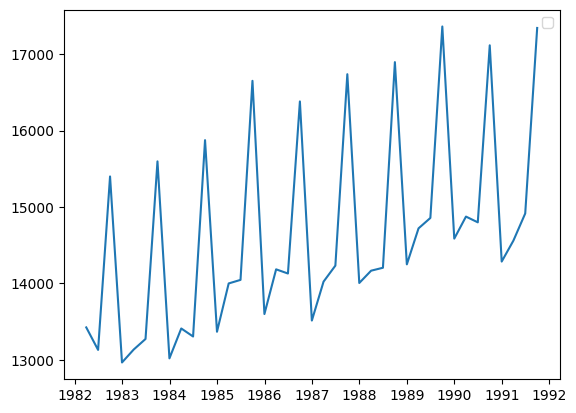

In [51]:
plt.plot(turn_over_data.TimeIndex, turn_over_data.Turnover)
plt.legend(loc='best')
plt.show()

시계열을 분해합니다.

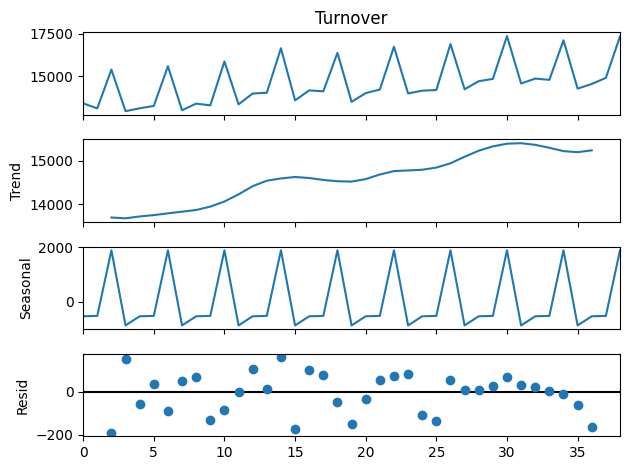

In [53]:
decomp_turn_over = sm.tsa.seasonal_decompose(turn_over_data.Turnover, model="additive", period=4) # Change 'freq' to 'period'
decomp_turn_over.plot()
plt.show()

트렌드, 계절성, 잔차를 다음과 같은 별도의 시리즈로 얻을 수 있습니다.

In [54]:
trend = decomp_turn_over.trend
seasonal = decomp_turn_over.seasonal
residual = decomp_turn_over.resid

## Recipe 1-5B. Time Series Decomposition: Multiplicative Model

곱셈 모델은 구성 요소가 곱해진다는 것을 시사합니다. 이 모델은 이차 또는 지수와 같이 비선형적이므로 시간이 지남에 따라 변화가 증가하거나 감소합니다. 계절성은 빈도 및/또는 진폭이 증가하거나 감소합니다.

In [55]:
air_passengers_data = pd.read_csv('/content/AirPax.csv')

In [56]:
date_range = pd.date_range(start='1/1/1949', end='31/12/1960',freq='M')
air_passengers_data ['TimeIndex'] = pd.DataFrame(date_range,columns=['Month'])
print(air_passengers_data.head())

   Year Month  Passenger  TimeIndex
0  1949   Jan        112 1949-01-31
1  1949   Feb        118 1949-02-28
2  1949   Mar        132 1949-03-31
3  1949   Apr        129 1949-04-30
4  1949   May        121 1949-05-31


<ipython-input-56-82f92230327c>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(start='1/1/1949', end='31/12/1960',freq='M')


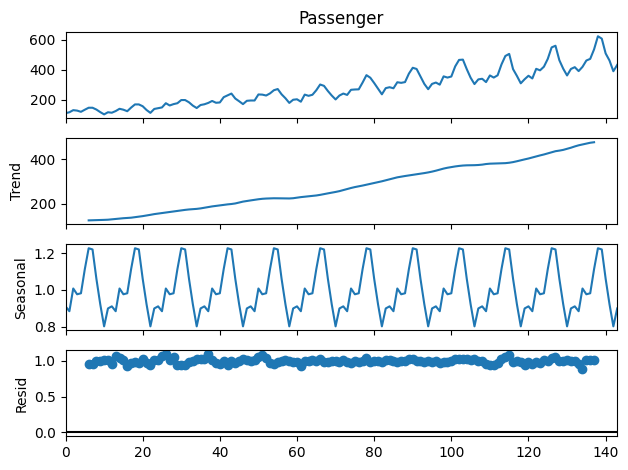

In [58]:
decomp_air_passengers_data = sm.tsa.seasonal_decompose(air_passengers_data.Passenger, model="multiplicative", period=12)
decomp_air_passengers_data.plot()
plt.show()

계절 구성 요소를 가져옵니다.

In [59]:
Seasonal_comp = decomp_air_passengers_data.seasonal
Seasonal_comp.head(4)

,seasonal
0,0.910230
1,0.883625
2,1.007366
3,0.975906


## Recipe 1-6. Visualization of Seasonality Problem

계절성을 시각화하고 감지하는 몇 가지 추가 방법을 살펴보겠습니다. 소매 매출 데이터는 분기별 계절성 구성 요소를 보여줍니다.

In [60]:
turn_over_data = pd.read_csv('/content/RetailTurnover.csv')
date_range = pd.date_range(start='1/7/1982', end='31/3/1992',freq='Q')
turn_over_data['TimeIndex'] = pd.DataFrame(date_range,columns=['Quarter'])

<ipython-input-60-263c39b9e56d>:2: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  date_range = pd.date_range(start='1/7/1982', end='31/3/1992',freq='Q')


이제 분기별 정보가 열에 있고, 연도별 정보가 행에 있으며, 값이 이직률 정보로 구성되도록 테이블을 회전시켜 보겠습니다.

그림은 분기별 매출액별 생산량을 보여줍니다.

In [61]:
quarterly_turn_over_data = pd.pivot_table(turn_over_data,values = "Turnover", columns = "Quarter", index = "Year")
quarterly_turn_over_data

Quarter,Q1,Q2,Q3,Q4
Year,,,,
1982,NaN,NaN,13423.2,13128.8
1983,15398.8,12964.2,13133.5,13271.7
1984,15596.3,13018.0,13409.3,13304.2
1985,15873.9,13366.5,13998.6,14045.1
1986,16650.3,13598.4,14183.2,14128.5
1987,16380.7,13512.8,14022.1,14231.8
1988,16737.0,14004.5,14165.5,14203.9
1989,16895.1,14248.2,14719.5,14855.8
1990,17361.6,14585.2,14873.5,14798.4


네 분기에 대한 선 그래프를 그려 보겠습니다.

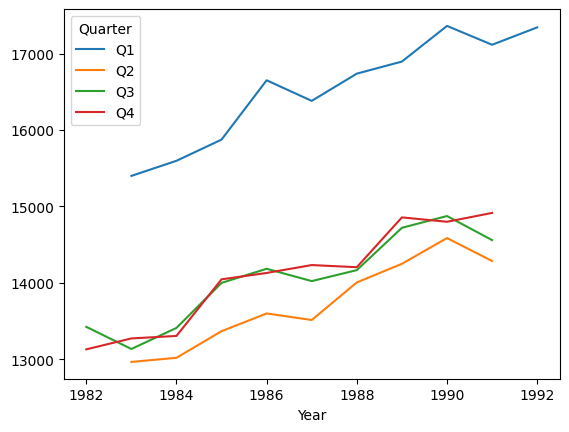

In [62]:
quarterly_turn_over_data.plot()
plt.show()

그림은 분기별 박스 플롯의 출력을 보여줍니다.

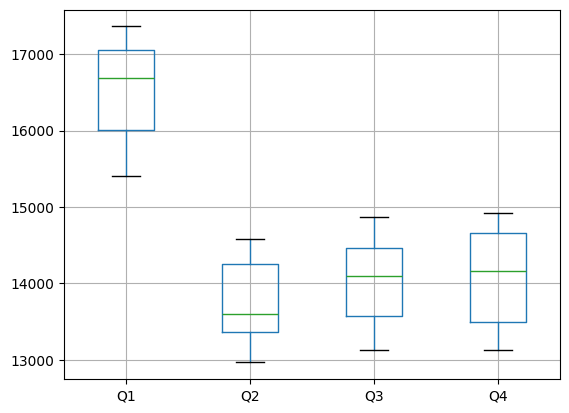

In [63]:
quarterly_turn_over_data.boxplot()
plt.show()

박스 플롯과 라인 플롯을 모두 살펴보면 1분기에는 연간 매출이 상당히 높고 2분기에는 상당히 낮다는 결론을 내릴 수 있습니다.